# Stroke Prediction

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [280]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [281]:
data.shape

(5110, 12)

In [282]:
data['stroke'].unique()

array([1, 0], dtype=int64)

In [283]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [284]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


In [286]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [287]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [288]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# delete unneccessory columns

In [289]:
data.drop('id',axis=1,inplace=True)

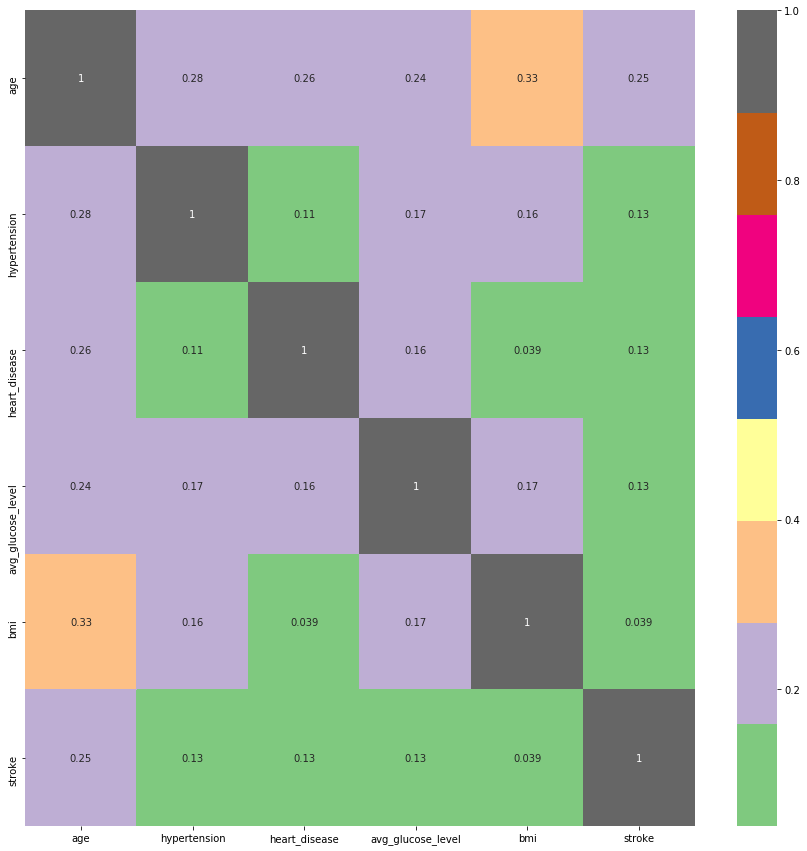

In [290]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.Accent)

In [291]:
# abs_corr = data.corr()['stroke'].sort_values(ascending=False)[1:]
# corr = abs(abs_corr)
# correlation = corr[corr>0.8]
# correlation 

In [292]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.00,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.00,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.00,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.00,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.00,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.00,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.00,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.00,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.00,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.00,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [293]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [294]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [296]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [297]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

# label encoding on categorical data

In [276]:
label = LabelEncoder()

In [278]:
data['gender'] = label.fit_transform(data['gender'])
data['ever_married'] = label.fit_transform(data['ever_married'])
data['work_type'] = label.fit_transform(data['work_type'])
data['Residence_type'] = label.fit_transform(data['Residence_type'])
data['smoking_status'] = label.fit_transform(data['smoking_status'])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.00,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.00,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.00,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.00,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.00,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.00,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.00,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.00,0,0,0,2,1,94.39,22.800000,2,1
8,0,59.00,0,0,1,2,0,76.15,28.893237,0,1
9,0,78.00,0,0,1,2,1,58.57,24.200000,0,1


# split data into independent and dependent features

In [243]:
X = data.drop('stroke',axis=1)
y = data['stroke']

# split data into train and test

In [244]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [245]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

# Feature Scaling for scale data

In [246]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [254]:
import pickle
import os


In [255]:
# save scaler object
scaler_path = os.path.join('C:/Users/om sai ram/Desktop/DS/stroke prediction/' , 'model/scaler.pkl')
with open(scaler_path , 'wb') as sf:
    pickle.dump(sc , sf)

In [196]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [197]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

# Train with DecisionTreeClassifier

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [199]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_std,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [200]:
pred1 = dtc.predict(X_test_std)
pred1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [201]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
2039    0
1500    0
2422    0
257     0
5084    0
4630    0
4116    0
1498    0
844     0
3370    0
2283    0
899     0
2014    0
4546    0
2868    0
4821    0
1860    0
629     0
4276    0
1100    0
42      1
4778    0
3269    0
1001    0
4872    0
       ..
2013    0
2568    0
3300    0
2828    0
657     0
550     0
1089    0
3375    0
4783    0
2569    0
1819    0
147     1
2695    0
4195    0
457     0
557     0
1745    0
1867    0
4464    0
129     1
2843    0
2518    0
3329    0
3061    0
1387    0
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [202]:
diff = pd.DataFrame(np.c_[Y_test,pred1],columns=['Actual','Predicted'])
diff

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [203]:
dtc_acc = accuracy_score(pred1 , Y_test)
dtc_acc

0.8992172211350293

# Train with LogisticRegression

In [204]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train_std,Y_train)
pred2 = lg.predict(X_test_std)
lg_acc = accuracy_score(pred2 , Y_test)
lg_acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9471624266144814

# Train with LogisticRegression

In [205]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_std,Y_train)
pred3 = knn.predict(X_test_std)
knn_acc = accuracy_score(pred3 , Y_test)
knn_acc

0.9452054794520548

# Train with RandomForestClassifier

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train_std,Y_train)
pred4 = rfc.predict(X_test_std)
rfc_acc = accuracy_score(pred4 , Y_test)
rfc_acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9422700587084148

# Train with SVC

In [207]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train_std,Y_train)
pred5 = svc.predict(X_test_std)
svc_acc = accuracy_score(pred5 , Y_test)
svc_acc

0.9471624266144814

# Check which algorithm gives best accuracy

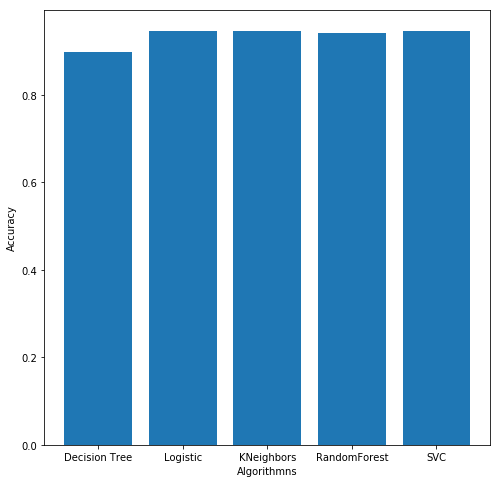

In [208]:
plt.figure(figsize=(8,8))
plt.bar(['Decision Tree' , 'Logistic' , 'KNeighbors' , 'RandomForest' , 'SVC'],[dtc_acc , lg_acc , knn_acc , rfc_acc , svc_acc])
plt.xlabel('Algorithmns')
plt.ylabel('Accuracy')
plt.show()

In [209]:
[dtc_acc , lg_acc , knn_acc , rfc_acc , svc_acc] # LogisticRegression and SupportVectorClassifier gave best result

[0.8992172211350293,
 0.9471624266144814,
 0.9452054794520548,
 0.9422700587084148,
 0.9471624266144814]

In [256]:
import joblib

In [258]:
model_path = os.path.join('C:/Users/om sai ram/Desktop/DS/stroke prediction/' , 'model/decision_tree_model.sav')
joblib.dump(dtc , model_path)

['C:/Users/om sai ram/Desktop/DS/stroke prediction/model/decision_tree_model.sav']

In [259]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.100000,2
4017,0,44.0,0,0,1,2,0,110.41,30.500000,3
744,0,71.0,1,0,1,2,1,194.62,31.600000,2
1799,1,34.0,0,0,1,2,1,108.12,22.200000,0
2314,1,82.0,0,0,1,2,1,89.83,24.700000,3
2039,0,65.0,0,0,1,2,1,74.01,28.700000,3
1500,0,38.0,0,0,1,2,0,81.28,33.200000,3
2422,1,65.0,1,0,1,3,1,113.86,36.400000,2
257,0,32.0,0,0,1,2,0,77.67,32.300000,3
5084,1,67.0,0,0,1,2,0,97.04,26.900000,3
